In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
df=pd.read_csv("/content/1oifo68oqn.csv")
#print(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [ ]:
print(df.isnull().sum())
#checking whether any null value exits in the dataframe
#here zip has 3509 null values 

lat             0
lng             0
desc            0
zip          3509
title           1
timeStamp       1
twp             8
addr            1
e               1
dtype: int64


In [ ]:
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()
#cleaning data and creating a new df without null on zip

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          5
addr         0
e            0
dtype: int64

In [ ]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum()
# cleaning data and creating a new df without null on twp

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [ ]:
df_wrang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24648 entries, 0 to 28160
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lat         24648 non-null  float64
 1   lng         24648 non-null  float64
 2   desc        24648 non-null  object 
 3   zip         24648 non-null  float64
 4   title       24648 non-null  object 
 5   timeStamp   24648 non-null  object 
 6   twp         24648 non-null  object 
 7   addr        24648 non-null  object 
 8   e           24648 non-null  float64
 9   Department  24648 non-null  object 
 10  Reason      24648 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.3+ MB


In [ ]:
df_wrang['zip'].value_counts().head(10)
#1 the top 10 zip codes are:

19401.0    1970
19464.0    1921
19403.0    1413
19446.0    1368
19406.0     901
19002.0     879
19468.0     876
19454.0     810
19090.0     776
19426.0     774
Name: zip, dtype: int64

In [ ]:
print(19446 and 19090 in df['zip'].unique())
#yes both the zip exists in the data frame

True


In [ ]:
town=np.array(['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON'])
z=np.array(df_wrang['twp'])
for i in range(len(town)):
  for j in range(len(z)):
    if z[j]==town[i]:
      print(town[i],"town is in list")
      break
    else:
      pass
#All the four towns exist in the data

LOWER POTTSGROVE town is in list
NORRISTOWN town is in list
HORSHAM town is in list
ABINGTON town is in list


In [ ]:
df_wrang['title'].nunique()


90

In [ ]:
df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])
df_wrang.head()
#q3 ans:-spliting the title column and appending 2 new column as department and Reason 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0,CARDIAC EMERGENCY,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1.0,HEAD INJURY,EMS


In [ ]:
z=df_wrang['Reason'].value_counts()
print(z)
#The most common reason for 911 call is : EMS 2nd is Traffic



EMS        12139
Traffic     8907
Fire        3602
Name: Reason, dtype: int64


{'EMS': 12139, 'Traffic': 8907, 'Fire': 3602}


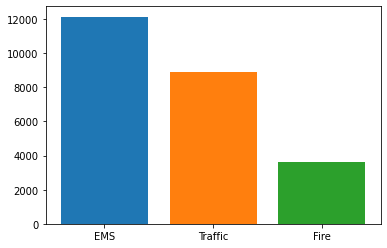

In [ ]:
#sns.countplot(x=df_wrang['Reason'])
z=dict(df_wrang['Reason'].value_counts())

for i,key in enumerate(z):  
  plt.bar(i,z[key])

plt.xticks(np.arange(len(z)),z.keys())
plt.show()
#to place the chart horizontally use barh


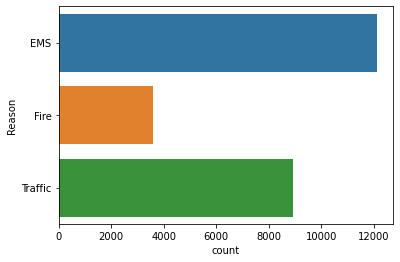

In [ ]:
sns.countplot(y=df_wrang['Reason'])

In [ ]:
df_wrang['timeStamp'] = pd.to_datetime(df_wrang['timeStamp'])#converting timestamp from string to datetime dataytype
df_wrang['Month'] = df_wrang['timeStamp'].apply(lambda x:x.month)#creating a month column with month
df_wrang['DayOfWeek'] = df_wrang['timeStamp'].apply(lambda x:x.dayofweek)#creating day column with day
df_wrang.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,BACK PAINS/INJURY,EMS,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,DIABETIC EMERGENCY,EMS,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,GAS-ODOR/LEAK,Fire,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0,CARDIAC EMERGENCY,EMS,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1.0,HEAD INJURY,EMS,12,3


In [ ]:
daydict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_wrang['DayOfWeek']  = df_wrang['DayOfWeek'].map(daydict)
#converting days in numbers to name of the day , using mapping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_wrang.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0,BACK PAINS/INJURY,EMS,Dec,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,DIABETIC EMERGENCY,EMS,Dec,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0,GAS-ODOR/LEAK,Fire,Dec,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1.0,CARDIAC EMERGENCY,EMS,Dec,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1.0,HEAD INJURY,EMS,Dec,3


In [ ]:
print(df_wrang['DayOfWeek'][df_wrang['Reason']=='EMS'].value_counts())
#tuesday  has highest calls of 1841


Tue     1841
Mon     1825
Fri     1747
Wed     1732
Thur    1729
Sun     1662
Sat     1603
Name: DayOfWeek, dtype: int64


Tue     1631
Wed     1397
Mon     1327
Sat     1287
Thur    1248
Fri     1167
Sun      850
Name: DayOfWeek, dtype: int64


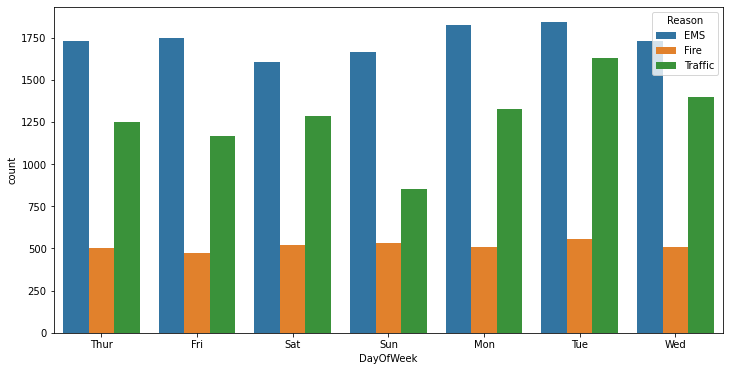

In [ ]:
#Create a countplot of the Day of Week column with the hue based of the Reason column & Question 
#6: On which day traffic calls were lowest?
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',data=df_wrang,hue='Reason')
print(df_wrang['DayOfWeek'][df_wrang['Reason']=='Traffic'].value_counts())
#sunday had least calls

In [ ]:
#Create a countplot month wise --Question 7: Which month saw highest calls for fire?
#plt.figure(figsize=(10,6))
mondict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_wrang['Month']=df_wrang['Month'].map(mondict)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Jan    1668
Feb     977
Dec     957
Name: Month, dtype: int64


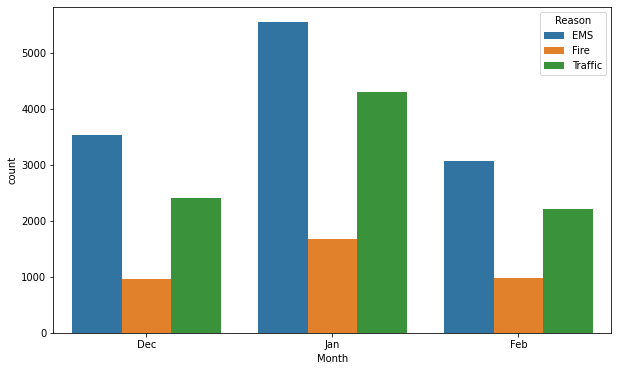

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_wrang['Month'],data=df_wrang,hue='Reason')
x=df_wrang['Month'][df_wrang['Reason']=='Fire'].value_counts()
print(x)

In [ ]:
df_new=df_wrang[df_wrang['Reason']=='Fire']
lat=df_new['lat']
lon=df_new['lng']

map=folium.Map(location=[40.2978759,-75.5812935],zoom_start=5,tiles='Mapbox Bright')

fg=folium.FeatureGroup(name="module8")
for lt,lg in zip(lat,lon):
  fg.add_child(folium.Marker(location=[lt,lg], popup="Fire", icon=folium.Icon(color="green")))
map.add_child(fg)
map.save('Fire.html')